# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

f56afc46ae7e741502d249bb8f2d54ca


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#use dataset to see location of each value
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
apiKey=weather_api_key
#city="hithadhoo"
city_url = f"{url}appid={apiKey}&units={units}&q={city}"
city_weather = requests.get(city_url).json()
print(city_weather)


{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 503, 'main': 'Rain', 'description': 'very heavy rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 70.99, 'feels_like': 72.21, 'temp_min': 70.2, 'temp_max': 73.38, 'pressure': 1014, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'rain': {'1h': 19.98}, 'clouds': {'all': 100}, 'dt': 1680280889, 'sys': {'type': 2, 'id': 2005473, 'country': 'US', 'sunrise': 1680280251, 'sunset': 1680324703}, 'timezone': -36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"
apiKey=weather_api_key



# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={apiKey}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #city = city_weather['name']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmannaeyjar
Processing Record 2 of Set 1 | salalah
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | port blair
Processing Record 6 of Set 1 | laguna
Processing Record 7 of Set 1 | sainte-maxime
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | nuuk
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | chagda
City not found. Skipping...
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | sandwick
Processing Record 21 of Set 1 | port eliz

Processing Record 39 of Set 4 | sagua la grande
Processing Record 40 of Set 4 | humberto de campos
Processing Record 41 of Set 4 | tampakan
Processing Record 42 of Set 4 | omsukchan
Processing Record 43 of Set 4 | argentan
Processing Record 44 of Set 4 | nabire
Processing Record 45 of Set 4 | taunggyi
Processing Record 46 of Set 4 | tanshui
City not found. Skipping...
Processing Record 47 of Set 4 | acapulco
Processing Record 48 of Set 4 | kattivakkam
Processing Record 49 of Set 4 | riyadh
Processing Record 0 of Set 5 | yulara
Processing Record 1 of Set 5 | tarakan
Processing Record 2 of Set 5 | rio gallegos
Processing Record 3 of Set 5 | jardim
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | udachnyy
Processing Record 6 of Set 5 | tiarei
Processing Record 7 of Set 5 | myanaung
Processing Record 8 of Set 5 | mauguio
Processing Record 9 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 5 | saskylakh
Processing Record 11 of Set 5 | 

City not found. Skipping...
Processing Record 30 of Set 8 | ballina
Processing Record 31 of Set 8 | farah
Processing Record 32 of Set 8 | ourinhos
Processing Record 33 of Set 8 | roma
Processing Record 34 of Set 8 | mana
Processing Record 35 of Set 8 | kvitok
Processing Record 36 of Set 8 | jinxiang
Processing Record 37 of Set 8 | irbeyskoye
Processing Record 38 of Set 8 | san jose de rio tinto
Processing Record 39 of Set 8 | achisay
City not found. Skipping...
Processing Record 40 of Set 8 | kabinda
Processing Record 41 of Set 8 | bridgetown
Processing Record 42 of Set 8 | pavlovka
Processing Record 43 of Set 8 | airai
Processing Record 44 of Set 8 | imbituba
Processing Record 45 of Set 8 | topeka
Processing Record 46 of Set 8 | hasaki
Processing Record 47 of Set 8 | cervo
Processing Record 48 of Set 8 | elk city
Processing Record 49 of Set 8 | santa rosa
Processing Record 0 of Set 9 | chumikan
Processing Record 1 of Set 9 | wichita falls
Processing Record 2 of Set 9 | zyryanka
Proces

Processing Record 25 of Set 12 | mahibadhoo
Processing Record 26 of Set 12 | wanaka
Processing Record 27 of Set 12 | keti bandar
Processing Record 28 of Set 12 | teahupoo
Processing Record 29 of Set 12 | ust-nera
Processing Record 30 of Set 12 | koboldo
City not found. Skipping...
Processing Record 31 of Set 12 | vila velha
Processing Record 32 of Set 12 | greenwood
Processing Record 33 of Set 12 | kostino
Processing Record 34 of Set 12 | kloulklubed
Processing Record 35 of Set 12 | lingao
Processing Record 36 of Set 12 | krasnoselkup
Processing Record 37 of Set 12 | aklavik
Processing Record 38 of Set 12 | tupik
Processing Record 39 of Set 12 | batemans bay
Processing Record 40 of Set 12 | along
Processing Record 41 of Set 12 | aksarka
Processing Record 42 of Set 12 | bogacs
Processing Record 43 of Set 12 | muros
Processing Record 44 of Set 12 | rungata
City not found. Skipping...
Processing Record 45 of Set 12 | alice springs
-----------------------------
Data Retrieval Complete     

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vestmannaeyjar,63.4427,-20.2734,8.55,93,100,8.23,IS,1680280883
1,salalah,17.0151,54.0924,28.05,69,0,3.09,OM,1680280851
2,albany,42.6001,-73.9662,8.83,40,99,0.89,US,1680280786
3,jamestown,42.0970,-79.2353,4.45,92,100,4.63,US,1680280689
4,port blair,11.6667,92.7500,26.68,80,92,2.66,IN,1680280879


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vestmannaeyjar,63.4427,-20.2734,8.55,93,100,8.23,IS,1680280883
1,salalah,17.0151,54.0924,28.05,69,0,3.09,OM,1680280851
2,albany,42.6001,-73.9662,8.83,40,99,0.89,US,1680280786
3,jamestown,42.0970,-79.2353,4.45,92,100,4.63,US,1680280689
4,port blair,11.6667,92.7500,26.68,80,92,2.66,IN,1680280879


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

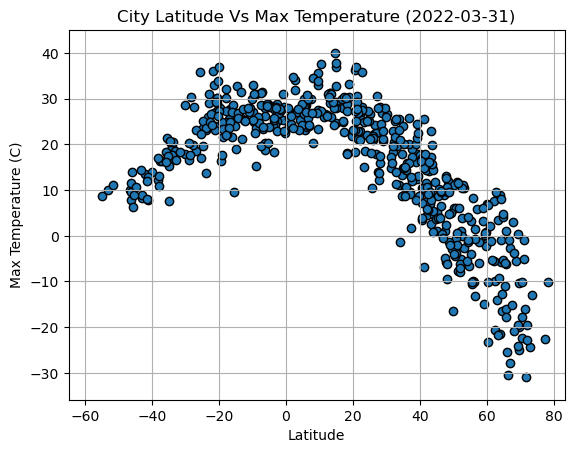

In [24]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude Vs Max Temperature (2022-03-31)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

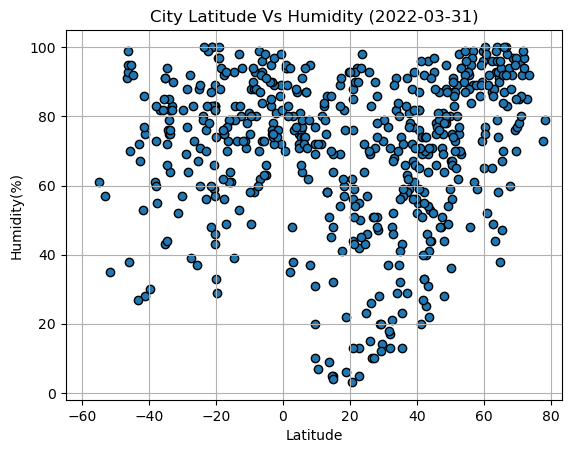

In [25]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude Vs Humidity (2022-03-31)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

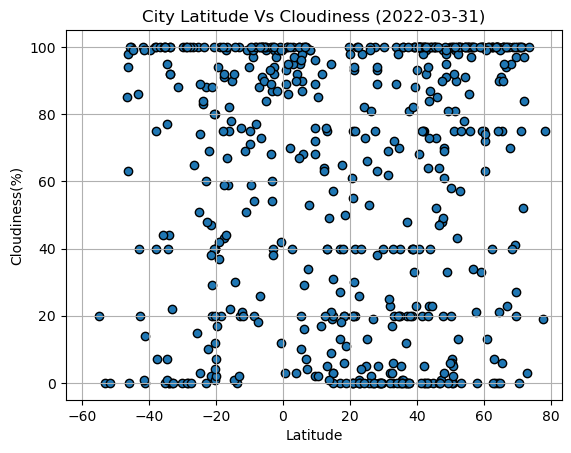

In [26]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude Vs Cloudiness (2022-03-31)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

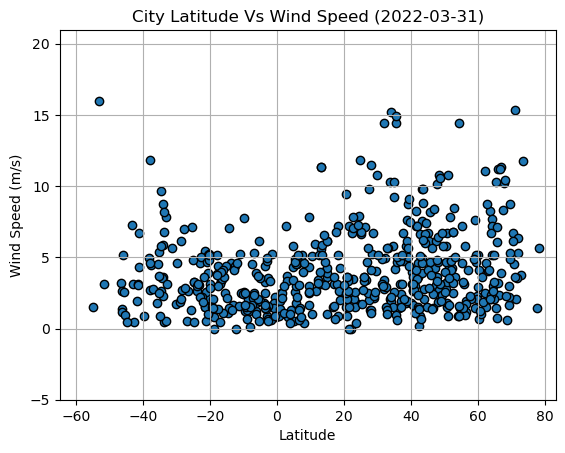

In [27]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude Vs Wind Speed (2022-03-31)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vestmannaeyjar,63.4427,-20.2734,8.55,93,100,8.23,IS,1680280883
1,salalah,17.0151,54.0924,28.05,69,0,3.09,OM,1680280851
2,albany,42.6001,-73.9662,8.83,40,99,0.89,US,1680280786
3,jamestown,42.0970,-79.2353,4.45,92,100,4.63,US,1680280689
4,port blair,11.6667,92.7500,26.68,80,92,2.66,IN,1680280879


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,lebu,-37.6167,-73.6500,16.41,55,7,4.47,CL,1680280856
10,rikitea,-23.1203,-134.9692,25.98,76,88,3.05,PF,1680280843
13,touros,-5.1989,-35.4608,28.90,63,84,6.16,BR,1680280911
14,carnarvon,-24.8667,113.6333,23.37,71,89,3.25,AU,1680280866
17,port elizabeth,-33.9180,25.5701,19.16,79,0,3.60,ZA,1680280894


###  Temperature vs. Latitude Linear Regression Plot

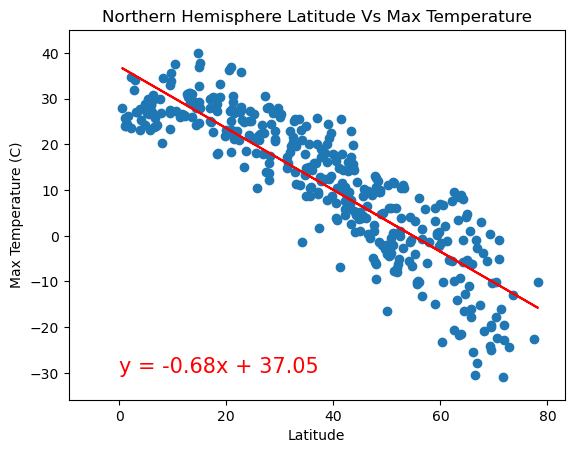

The r-value is: 0.7706279927499536.


In [16]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere Latitude Vs Max Temperature')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

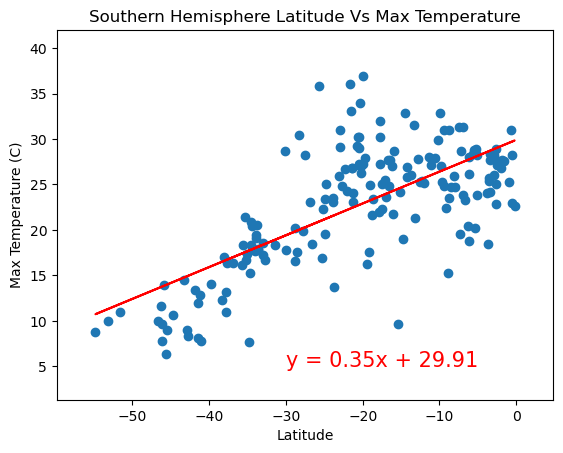

The r-value is: 0.492021876384535.


In [17]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere Latitude Vs Max Temperature')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

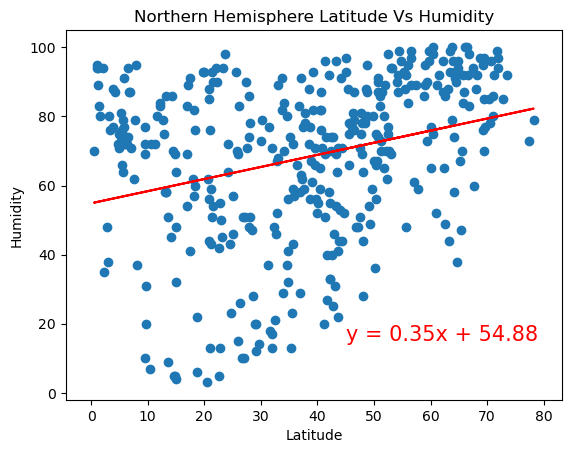

The r-value is: 0.08630754335133588.


In [18]:
# Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude Vs Humidity')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

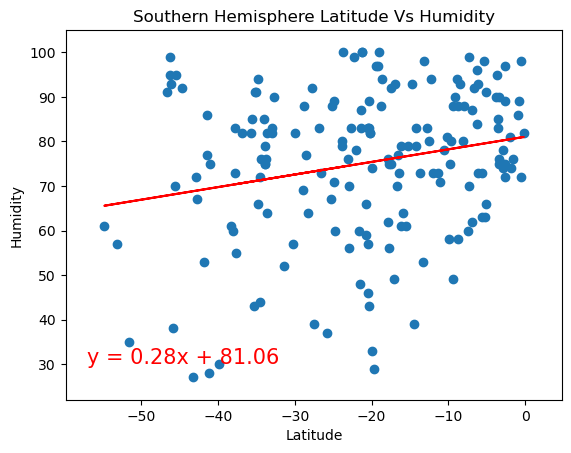

The r-value is: 0.0513037646653696.


In [19]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude Vs Humidity')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,30),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

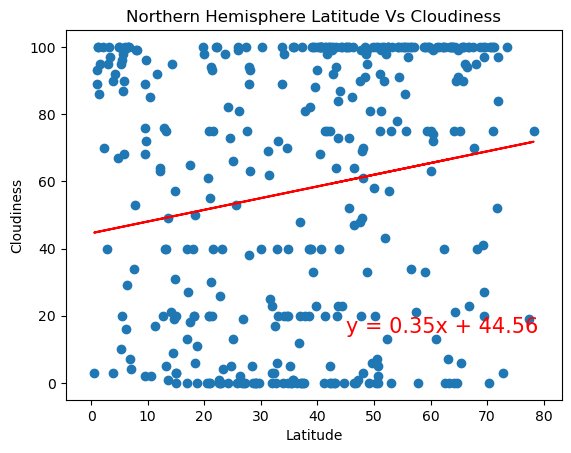

The r-value is: 0.030358232942868588.


In [20]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude Vs Cloudiness')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

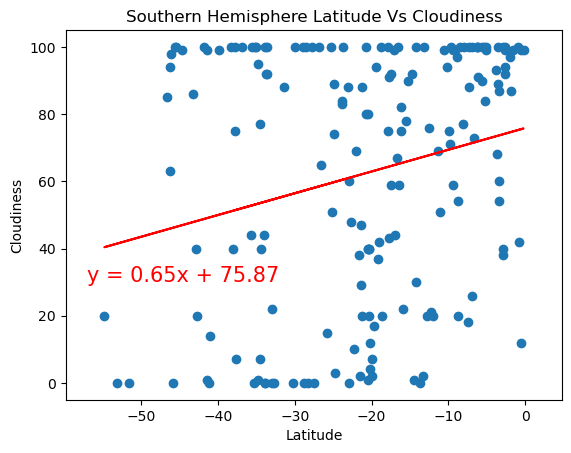

The r-value is: 0.05449079577792019.


In [21]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude Vs Cloudiness')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,30),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

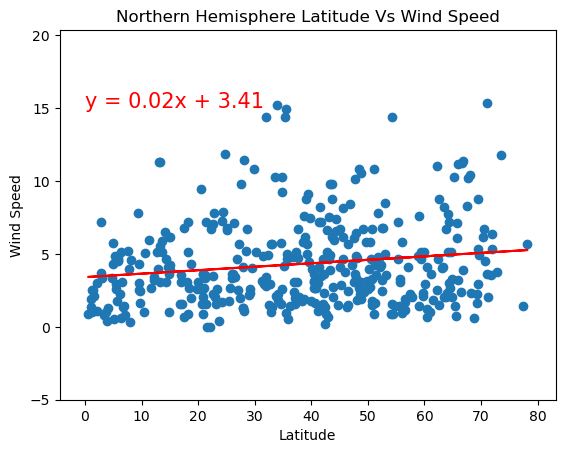

The r-value is: 0.025636032711192414.


In [22]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude Vs Wind Speed')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

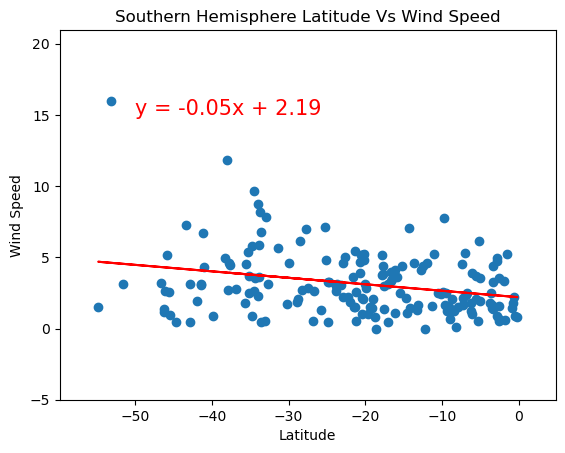

The r-value is: 0.07421028771022725.


In [23]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude Vs Wind Speed')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

**Discussion about the linear relationship:** YOUR RESPONSE HERE